In [1]:
# magics: ensures that any changes to the modules loaded below will be re-loaded automatically
%load_ext autoreload
%autoreload 2

# load packages
import numpy as np
import matplotlib.pyplot as plt


# Exercise 3 [L2]: Interpolation and continuous choice 

Consider the following Python code to create do linear interpolation:

In [2]:
f = lambda x: (x-3)**2 #Define the function to be interpolated

x_interp  = np.linspace(0,6,100) #Define the points at which the function will be interpolated
f_true  = f(x_interp) #Define the true function values at the interpolation points
x_known = np.array([0,1,2,3,4,5,6],dtype=float) #Define points at which the function is known
f_known = f(x_known) #Define the function values at the known points
f_linear_interp      = np.interp(x_interp,x_known,f_known) #Linear interpolation between known function values

### 1. Plot the true function, the known points and the linearly interpolated function in a single figure.

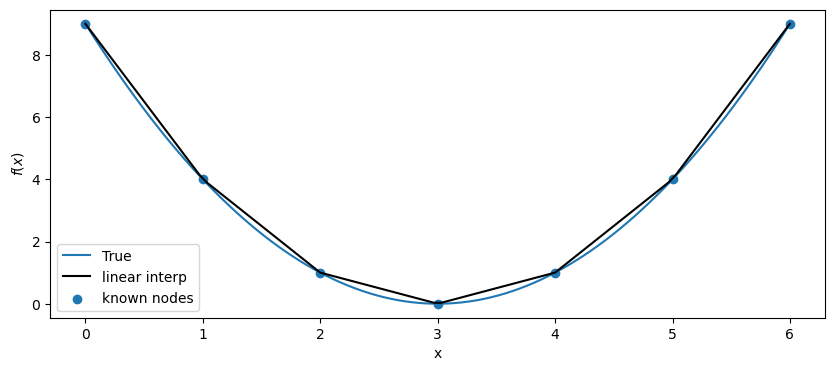

In [3]:
fig = plt.figure(figsize=(10,4)) 

ax = fig.add_subplot(1,1,1)
ax.plot(x_interp,f_true)
ax.plot(x_interp,f_linear_interp,'black')
ax.scatter(x_known,f_known)

ax.set_xlabel("x")
ax.set_ylabel("$f(x)$")
plt.legend(('True','linear interp','known nodes'))

plt.show()

Consider the consumption-saving model with *continous* consumption choice and *infinite time* horizon:
$$\begin{align*}
    V_{t}(W_{t}) & = \max_{c_{t}}\left\{ \sqrt{c_{t}}+\beta V_{t+1}(W_{t+1})\right\} \\
 & \text{s.t.}\\
W_{t+1} & = W_{t}-c_{t} \\
c_{t} & \leq  W_{t} , \,\forall t\\
c_{t} & \in  \mathbb{R}_+, \,\forall t
\end{align*}$$
for $\beta=0.90$ and $W_{1}=10$.

### 2. Solve the model using *value function iteration*, *grid search*, and *linear interpolation*.

Hint: For each possible wealth level (w) we choose consumption as a share of that wealth (). 

In [6]:
# load modules related to this exercise
import Exercise_3 as ex3

# Setup specifications in class. Defining a class is a neat way to access the parameters.
class par: pass
par.beta = 0.90
par.W = 10

# Grid
par.num_W = 200 # number of grid points for W
par.num_C = 50 # number of grid points for the choice space of C
par.grid_W = np.linspace(0.0,par.W,par.num_W) # grid for W

# Parameters for VFI
par.max_iter = 200   # maximum number of iterations
par.tol = 10e-5 #convergence tol. level

# Solve the model
sol = ex3.solve_consumption_grid_search(par)

### 3. Plot $V(W)$ (the value function) and $C^{\star}(W)$ (the consumption function). *Ensure that both function are increasing in $W$*. Compare the results to those found in the last exercise. - try changing the number of points in the state grid and consumption guess grid.

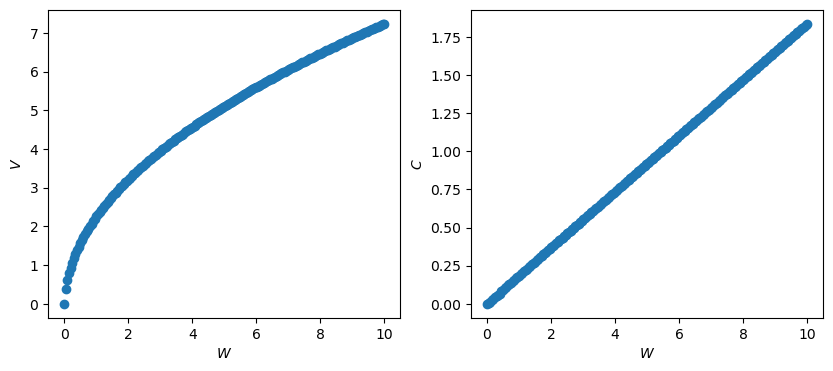

In [7]:
# define figure
def plot_solution(par,sol):
    fig = plt.figure(figsize=(10,4)) # figsize is in inches...
    
    grid_W = par.grid_W

    ax = fig.add_subplot(1,2,1)
    ax.scatter(grid_W,sol.V)
    ax.set_xlabel("$W$")
    ax.set_ylabel("$V$")

    ax_right = fig.add_subplot(1,2,2)
    ax_right.scatter(grid_W,sol.C)
    ax_right.set_xlabel("$W$")
    ax_right.set_ylabel("$C$")
    plt.show()
    
plot_solution(par,sol)

    Compare the results from Exercise 2 and Exercise 3:


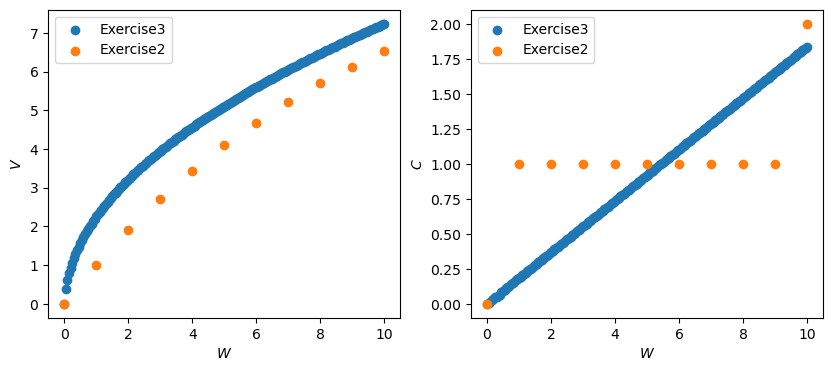

In [8]:
# compare the solution with the last excercise

#re-run ex2:
import Exercise_2 as ex2
class par_ex2: pass
par_ex2.beta = 0.90
par_ex2.W = 10
par_ex2.grid_W = np.arange(par_ex2.W+1)


# Parameters for VFI
par_ex2.max_iter = 200   # maximum number of iterations
par_ex2.tol = 10e-5 #convergence tol. level

sol_ex2 = ex2.solve_VFI(par_ex2)


#Plot the figures
fig = plt.figure(figsize=(10,4)) 
ax = fig.add_subplot(1,2,1)
ax.scatter(par.grid_W,sol.V)
ax.scatter(par_ex2.grid_W,sol_ex2.V)
ax.set_xlabel("$W$")
ax.set_ylabel("$V$")
plt.legend(('Exercise3','Exercise2'))


ax_right = fig.add_subplot(1,2,2)
ax_right.scatter(par.grid_W,sol.C)
ax_right.scatter(par_ex2.grid_W,sol_ex2.C)
ax_right.set_xlabel("$W$")
ax_right.set_ylabel("$C$")
plt.legend(('Exercise3','Exercise2'))

print('    Compare the results from Exercise 2 and Exercise 3:')
plt.show()

Number of state grid points: 10
Number of consumption guess grid: 5


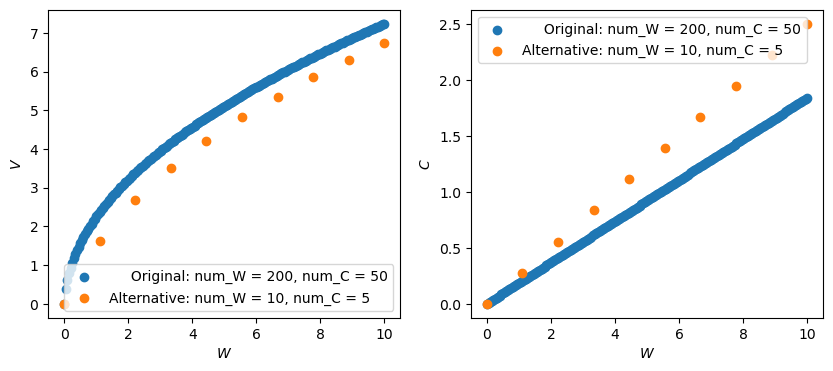

In [12]:
# change the number of points
class par_alt(par): pass # inherit from par
par_alt.num_W = 10
par_alt.num_C = 5
par_alt.grid_W = np.linspace(0.0,par_alt.W,par_alt.num_W)

sol_alt = ex3.solve_consumption_grid_search(par_alt)

print('Number of state grid points:', par_alt.num_W)
print('Number of consumption guess grid:', par_alt.num_C)

#Plot the figures
fig = plt.figure(figsize=(10,4)) 
ax = fig.add_subplot(1,2,1)
ax.scatter(par.grid_W,sol.V)
ax.scatter(par_alt.grid_W,sol_alt.V)
ax.set_xlabel("$W$")
ax.set_ylabel("$V$")
plt.legend((f'     Original: num_W = {par.num_W}, num_C = {par.num_C}',f'Alternative: num_W = {par_alt.num_W}, num_C = {par_alt.num_C}'))


ax_right = fig.add_subplot(1,2,2)
ax_right.scatter(par.grid_W,sol.C)
ax_right.scatter(par_alt.grid_W,sol_alt.C)
ax_right.set_xlabel("$W$")
ax_right.set_ylabel("$C$")
plt.legend((f'     Original: num_W = {par.num_W}, num_C = {par.num_C}',f'Alternative: num_W = {par_alt.num_W}, num_C = {par_alt.num_C}'))

plt.show()

The higher number of grid points, the better the interpolation as the errors gets smaller